In [1]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"

In [ ]:
# =============================================
# ÉTAPE 1: CHARGEMENT DES PACKAGES
# =============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print("✅ Tous les packages sont installés et importés!")

✅ Tous les packages sont installés et importés!


In [ ]:
# =============================================
# ÉTAPE 2: TÉLÉCHARGEMENT DU DATASET DIABETES
# =============================================
try:
    # Lien direct garanti
    url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"

    # Noms des colonnes selon la documentation
    column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                   'Insulin', 'BMI', 'DiabetesPedigree', 'Age', 'Outcome']

    # Téléchargement avec les noms de colonnes
    df = pd.read_csv(url, names=column_names)

    print("✅ Dataset téléchargé avec succès!")
    print(f"📊 Dimensions: {df.shape}")
    print(f"🔤 Colonnes: {df.columns.tolist()}")

except Exception as e:
    print(f"❌ Erreur: {e}")
    print("🔄 Utilisation de la méthode alternative...")

    # Méthode alternative
    !wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv
    df = pd.read_csv('pima-indians-diabetes.csv', names=column_names)

✅ Dataset téléchargé avec succès!
📊 Dimensions: (768, 9)
🔤 Colonnes: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigree', 'Age', 'Outcome']


In [ ]:
# =============================================
# ÉTAPE 3: VÉRIFICATION DES DONNÉES
# =============================================
print("🔍 VÉRIFICATION DES DONNÉES")
print("=" * 50)

# Aperçu des données
print("\n📋 PREMIÈRES LIGNES:")
print(df.head())

print("\n📊 INFORMATIONS GÉNÉRALES:")
print(df.info())

print("\n🧮 DESCRIPTION STATISTIQUE:")
print(df.describe())

print("\n🎯 DISTRIBUTION DE LA VARIABLE CIBLE:")
print(df['Outcome'].value_counts())
print(f"Pourcentage de diabétiques: {df['Outcome'].mean()*100:.2f}%")

🔍 VÉRIFICATION DES DONNÉES

📋 PREMIÈRES LIGNES:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigree  Age  Outcome  
0             0.627   50        1  
1             0.351   31        0  
2             0.672   32        1  
3             0.167   21        0  
4             2.288   33        1  

📊 INFORMATIONS GÉNÉRALES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       768 non-null    int64  
 1   Glucose           768 non-

In [ ]:
# =============================================
# ÉTAPE 4: NETTOYAGE ET PRÉPARATION
# =============================================
print("🧹 NETTOYAGE DES DONNÉES")
print("=" * 50)

# Vérification des valeurs nulles
print("📋 VALEURS MANQUANTES:")
print(df.isnull().sum())

# Vérification des valeurs zero qui devraient pas être zero
print("\n🔍 VALEURS ZÉRO PROBLÉMATIQUES:")
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_columns:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} valeurs zero ({zero_count/len(df)*100:.2f}%)")

# Remplacement des valeurs zero par la médiane
df_clean = df.copy()
for col in zero_columns:
    df_clean[col] = df_clean[col].replace(0, df_clean[col].median())

print("\n✅ Nettoyage terminé!")
print(f"Dataset shape: {df_clean.shape}")

🧹 NETTOYAGE DES DONNÉES
📋 VALEURS MANQUANTES:
Pregnancies         0
Glucose             0
BloodPressure       0
SkinThickness       0
Insulin             0
BMI                 0
DiabetesPedigree    0
Age                 0
Outcome             0
dtype: int64

🔍 VALEURS ZÉRO PROBLÉMATIQUES:
Glucose: 5 valeurs zero (0.65%)
BloodPressure: 35 valeurs zero (4.56%)
SkinThickness: 227 valeurs zero (29.56%)
Insulin: 374 valeurs zero (48.70%)
BMI: 11 valeurs zero (1.43%)

✅ Nettoyage terminé!
Dataset shape: (768, 9)


📊 VISUALISATION DES DONNÉES


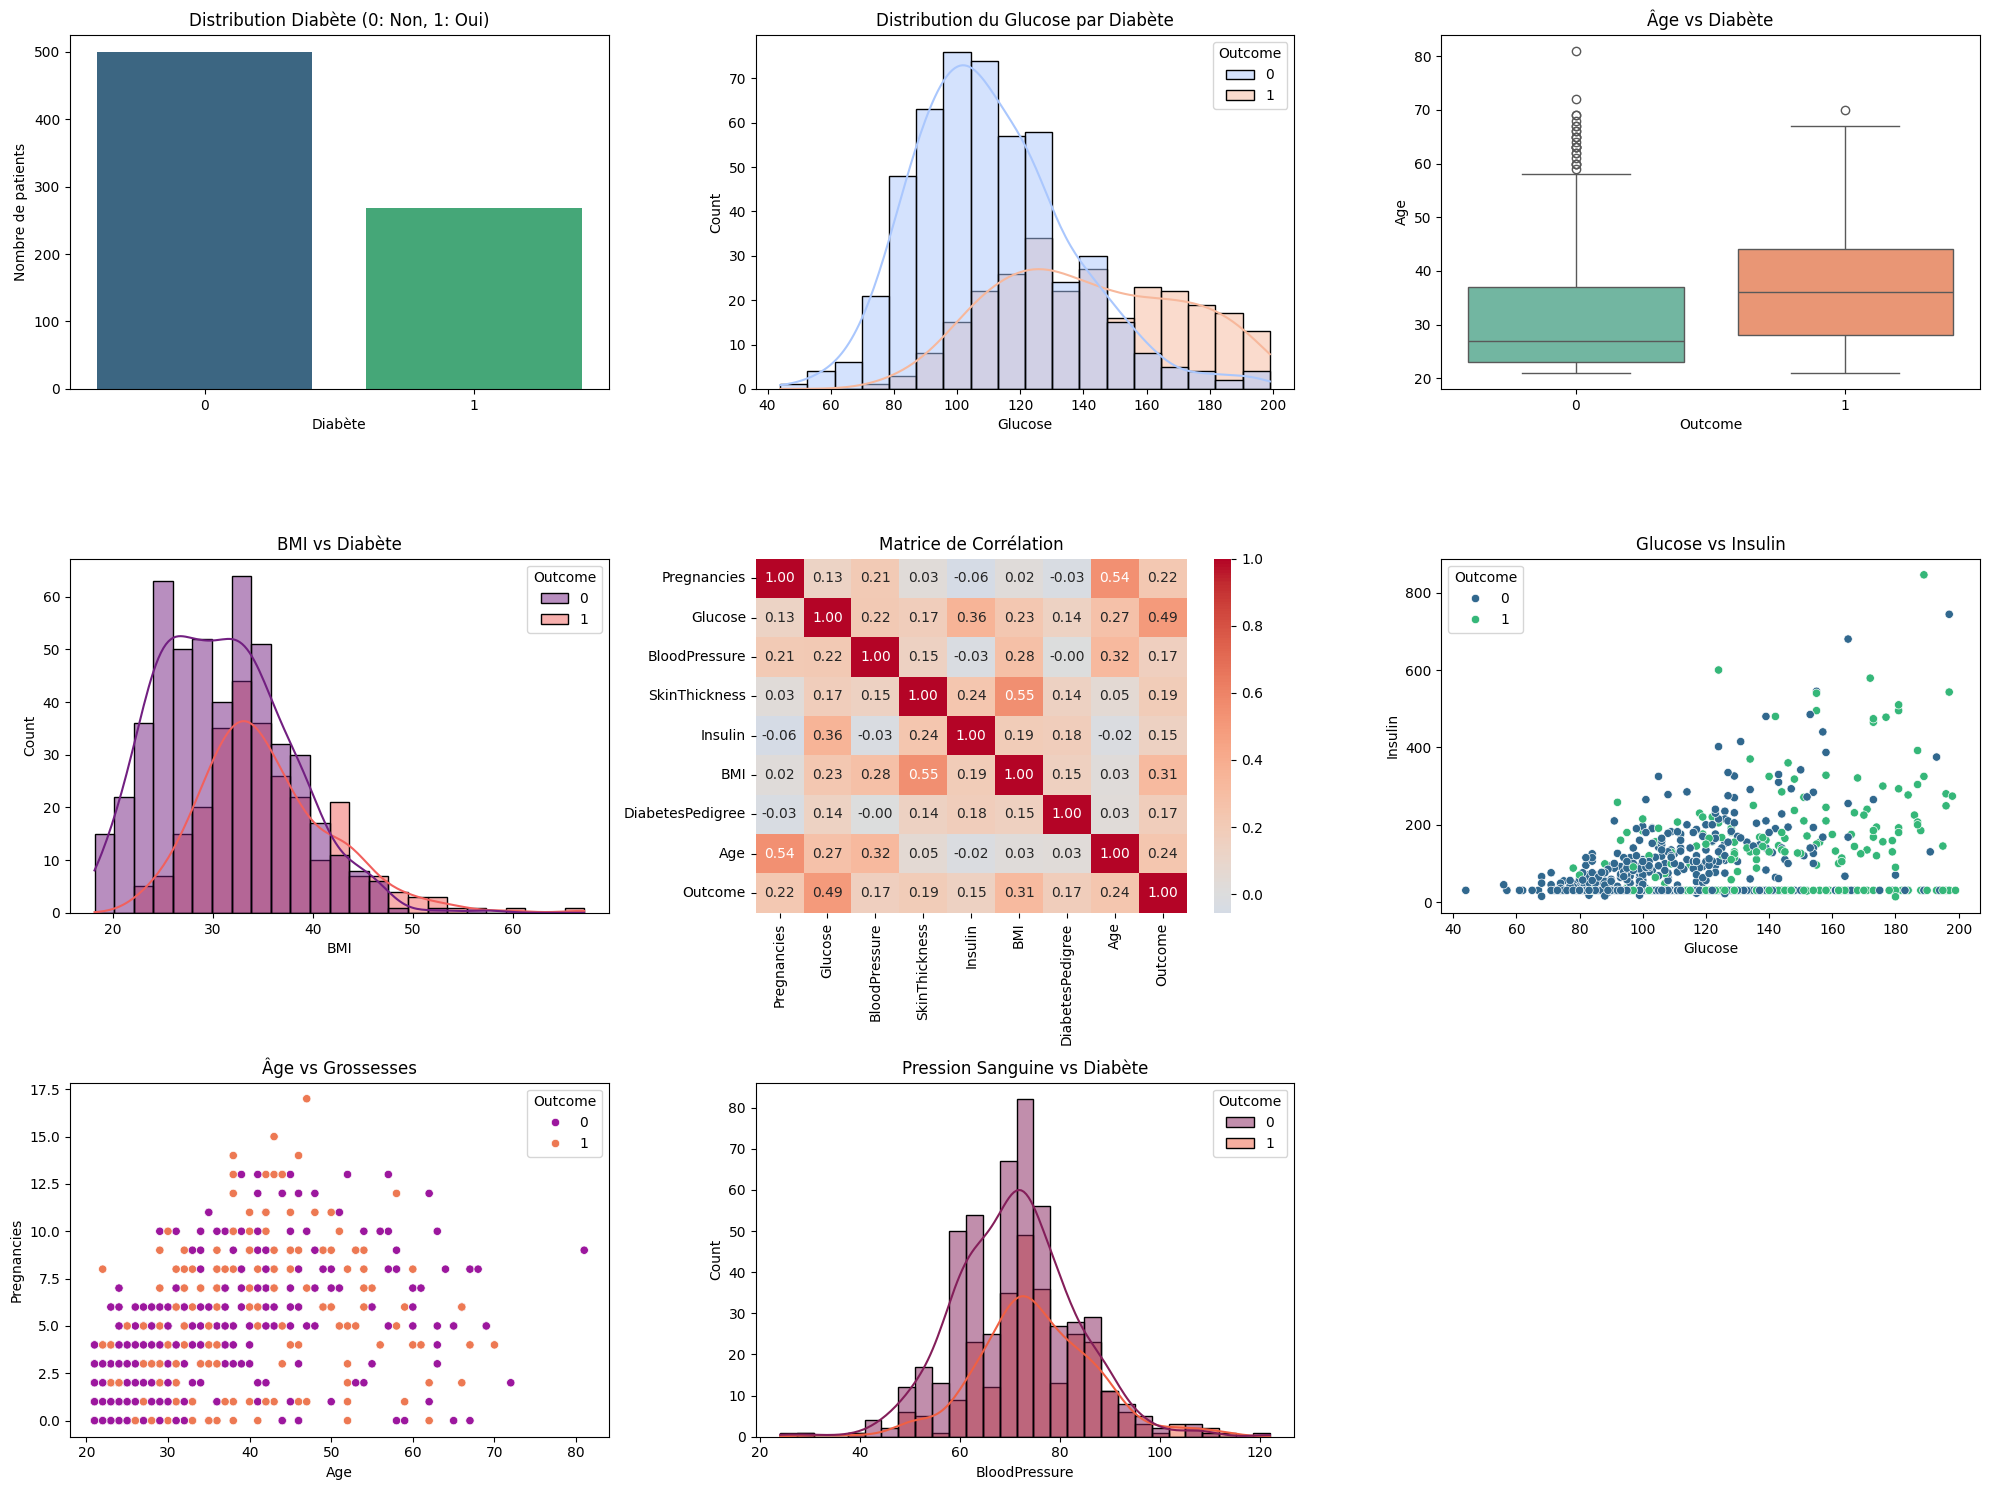

✅ Visualisations sauvegardées!


In [ ]:
# =============================================
# ÉTAPE 5: VISUALISATION
# =============================================
print("📊 VISUALISATION DES DONNÉES")
print("=" * 50)

# Configuration des graphiques
plt.figure(figsize=(20, 15))

# 1. Distribution de la variable cible
plt.subplot(3, 3, 1)
sns.countplot(data=df_clean, x='Outcome', palette='viridis')
plt.title('Distribution Diabète (0: Non, 1: Oui)')
plt.xlabel('Diabète')
plt.ylabel('Nombre de patients')

# 2. Distribution du Glucose
plt.subplot(3, 3, 2)
sns.histplot(data=df_clean, x='Glucose', hue='Outcome', kde=True, palette='coolwarm')
plt.title('Distribution du Glucose par Diabète')

# 3. Distribution de l'Âge
plt.subplot(3, 3, 3)
sns.boxplot(data=df_clean, x='Outcome', y='Age', palette='Set2')
plt.title('Âge vs Diabète')

# 4. Distribution du BMI
plt.subplot(3, 3, 4)
sns.histplot(data=df_clean, x='BMI', hue='Outcome', kde=True, palette='magma')
plt.title('BMI vs Diabète')

# 5. Heatmap de corrélation
plt.subplot(3, 3, 5)
correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice de Corrélation')

# 6. Glucose vs Insulin
plt.subplot(3, 3, 6)
sns.scatterplot(data=df_clean, x='Glucose', y='Insulin', hue='Outcome', palette='viridis')
plt.title('Glucose vs Insulin')

# 7. Pregnancies vs Age
plt.subplot(3, 3, 7)
sns.scatterplot(data=df_clean, x='Age', y='Pregnancies', hue='Outcome', palette='plasma')
plt.title('Âge vs Grossesses')

# 8. Blood Pressure distribution
plt.subplot(3, 3, 8)
sns.histplot(data=df_clean, x='BloodPressure', hue='Outcome', kde=True, palette='rocket')
plt.title('Pression Sanguine vs Diabète')

plt.tight_layout()
plt.savefig('diabetes_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualisations sauvegardées!")

In [ ]:
# =============================================
# ÉTAPE 6: PRÉPARATION MACHINE LEARNING
# =============================================
print("🤖 PRÉPARATION MACHINE LEARNING")
print("=" * 50)

# Séparation features/target
X = df_clean.drop

🤖 PRÉPARATION MACHINE LEARNING
